# Predict Annual Medical Insurance charges - Linear Regression
ACME Insurance offers health insurance in US.
We are predicting the annual medical expenditure for new customers.

In [97]:
from urllib.request import urlretrieve

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7f57a85d4b50>)

In [3]:
medical_df = pd.read_csv('medical.csv')
print('size: ', medical_df.shape)
medical_df.head()

size:  (1338, 7)


age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
medical_df['charges'] = medical_df['charges'].round(1)
medical_df['bmi'] = medical_df['bmi'].round(1)
medical_df.head()

age     sex   bmi  children smoker     region  charges
0   19  female  27.9         0    yes  southwest  16884.9
1   18    male  33.8         1     no  southeast   1725.6
2   28    male  33.0         3     no  southeast   4449.5
3   33    male  22.7         0     no  northwest  21984.5
4   32    male  28.9         0     no  northwest   3866.9

In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663303     1.094918  13270.422347
std      14.049960     6.098257     1.205493  12110.011368
min      18.000000    16.000000     0.000000   1121.900000
25%      27.000000    26.300000     0.000000   4740.300000
50%      39.000000    30.400000     1.000000   9382.050000
75%      51.000000    34.700000     2.000000  16639.900000
max      64.000000    53.100000     5.000000  63770.400000

In [7]:
# set styles for charts

sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age distribution

In [8]:
medical_df.age.nunique()

47

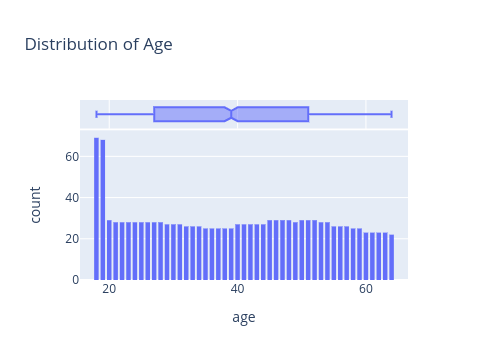

In [9]:
fig = px.histogram(medical_df,
                  x = 'age',
                  marginal = 'box',
                  nbins = 47,
                  title = 'Distribution of Age')
fig.update_layout(bargap=0.3)
fig.show()

In [10]:
# medical_df[medical_df['age'].isin([18,19])]
age_df = medical_df.query('age == [18,19]')
age_df

age     sex   bmi  children smoker     region  charges
0      19  female  27.9         0    yes  southwest  16884.9
1      18    male  33.8         1     no  southeast   1725.6
15     19    male  24.6         1     no  southwest   1837.2
22     18    male  34.1         0     no  southeast   1137.0
31     18  female  26.3         0     no  northeast   2198.2
...   ...     ...   ...       ...    ...        ...      ...
1315   18    male  28.3         1     no  northeast  11272.3
1316   19  female  20.6         0     no  southwest   1731.7
1317   18    male  53.1         0     no  southeast   1163.5
1334   18  female  31.9         0     no  northeast   2206.0
1335   18  female  36.8         0     no  southeast   1629.8

[137 rows x 7 columns]

### Body Mass Index (BMI)

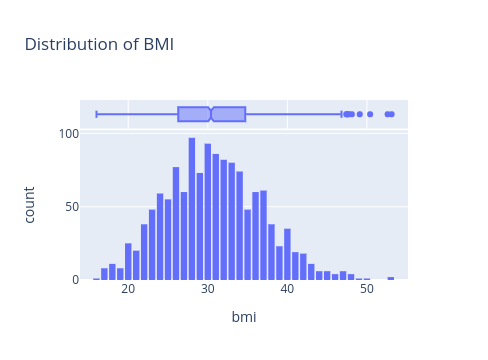

In [11]:
# Distribution of BMI

fig = px.histogram(medical_df,
                  x = 'bmi',
                  marginal = 'box',
                 # color_discrete_sequence=['blue'],
                  title='Distribution of BMI'
                  )
fig.update_layout(bargap=0.2)
fig.show()

<p> BMI distribution shows that large population is either overweight or obese.</p>
<img src="image/bmi-chart.jpg" style="float: right;" width="500">

In [12]:
#from IPython.display import Image
#Image("/home/amrit/Downloads/bmi_chart.jpg")

### Charges

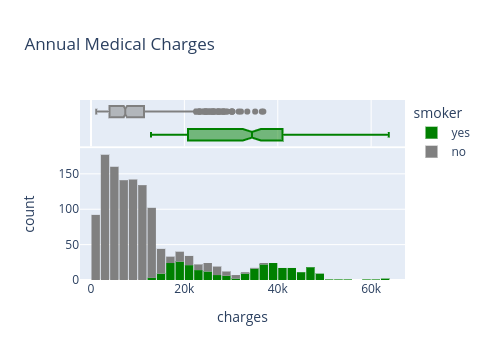

In [13]:
# Visualize distribution of charges
# Use smoker column to view charges for smoker and non-smokers

fig = px.histogram(medical_df,
                  x = 'charges',
                  marginal = 'box',
                  color = 'smoker',
                  color_discrete_sequence=['green','grey'],
                  title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

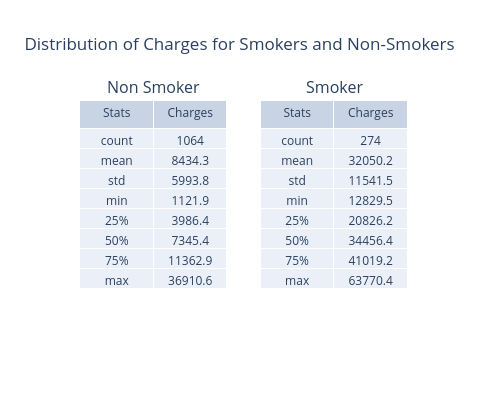

In [14]:
ns_df = medical_df[['charges','smoker']].query('smoker == "no"').describe().round(1)
s_df = medical_df[['charges','smoker']].query('smoker == "yes"').describe().round(1)
stats = list(ns_df.index)

fig = make_subplots(
    rows = 1, cols = 2,
    shared_yaxes=True,
    specs=[ [{"type": "table"},
            {"type": "table"}]
          ],
    subplot_titles=['Non Smoker','Smoker' ]
)


fig.add_trace(go.Table(
    header = dict(values=['Stats','Charges'],
                 align='center'
                # fill_color='blue'
                 ),
    cells = dict(values=[stats, ns_df.charges]
                )
), row=1, col=1 )

fig.add_trace(go.Table(
    header = dict(values=['Stats','Charges'],
                 align='center'
                # fill_color='blue'
                 ),
    cells = dict(values=[stats, s_df.charges]
                )
), row=1, col=2 )

fig.update_layout(
                 height = 400,
                 title='Distribution of Charges for Smokers and Non-Smokers'
                )
fig.show()

<p>Observations from the above graphs:</p>
<p>Medical charges for smokers are substantially higher as compared to non-smokers</p>

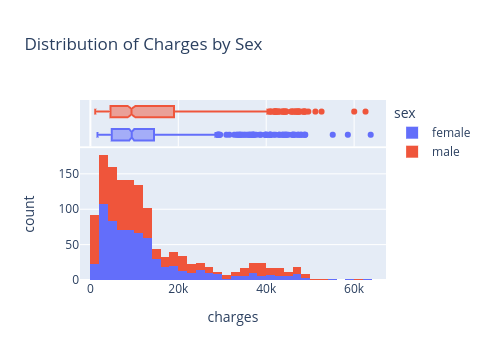

In [15]:
# Distribution of charges by sex

fig = px.histogram(medical_df,
                  x='charges',
                  marginal='box', 
                  color='sex',
                  title='Distribution of Charges by Sex'
                  )

fig.show()

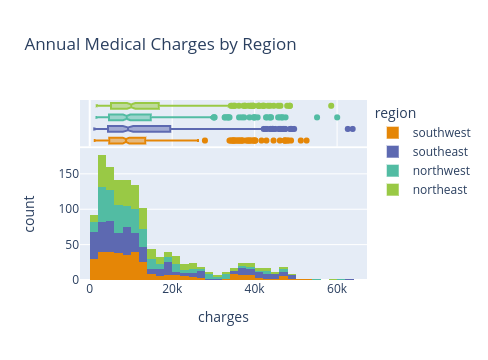

In [16]:
# Distribution of charges by Region

fig = px.histogram(medical_df,
                  x='charges',
                  marginal='box',
                  color='region',
                color_discrete_sequence=px.colors.qualitative.Vivid,
                  title='Annual Medical Charges by Region'
                  )

fig.show()

### Smoker
<p> Explore Smoker column in more detail.</p>

In [17]:
print('Percentage of Smoker and Non-Smoker:')
medical_df.smoker.value_counts() / medical_df.smoker.value_counts().sum() * 100

Percentage of Smoker and Non-Smoker:


no     79.521674
yes    20.478326
Name: smoker, dtype: float64

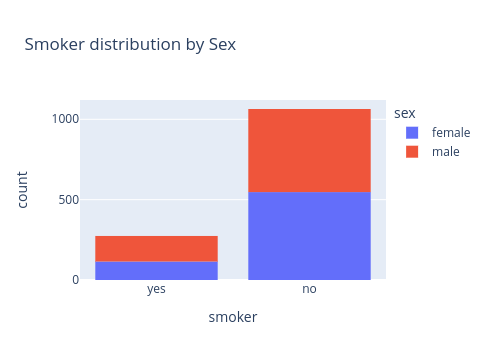

In [18]:
px.histogram(medical_df,
            x='smoker',
            color='sex',
            title='Smoker distribution by Sex')

### Sex

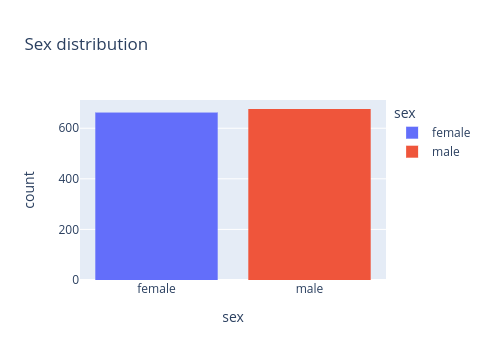

In [19]:
px.histogram(medical_df,
             x='sex',
             color='sex',
             title='Sex distribution'
            )

### Region

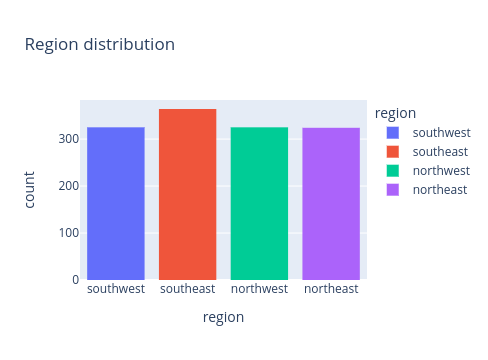

In [20]:
px.histogram(medical_df,
            x='region',
            color='region',
            title='Region distribution')

#### Children

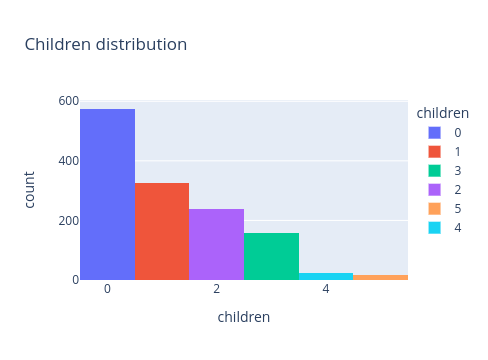

In [21]:
px.histogram(medical_df,
            x='children',
            color='children',
            title='Children distribution')

---
### Age vs Charges

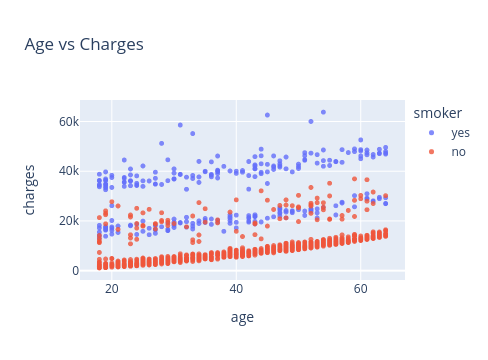

In [22]:
fig = px.scatter(medical_df,
                x='age',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

<p> Trend shows that medical charges increase with age. There is significant variation at every age and the age alone cannot be used to accurately determine charges.</p>

<p> Chart shows 3 clusters of points, each of which seems to form a line with an increasing slope:</p>

- 1st cluster consists of non-smokers with low medical charges.
- 2nd cluster contains a mix of smokers and non-smokers. Possibly, smokers without acute medical ailment and non-smoker with acute medical ailment.
- 3rd cluster exclusively made of smoker, persumably with severe medical condition.
- Chart also shows few outliers for smokers and non-smokers as well.

---
### BMI and Charges

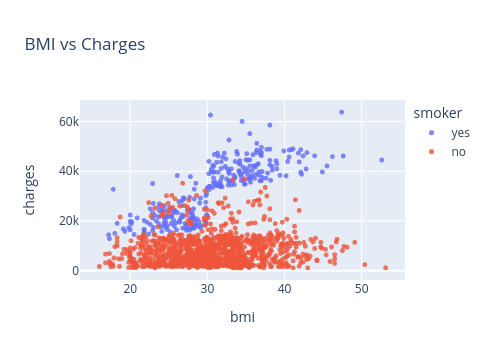

In [23]:
fig = px.scatter(medical_df,
                  x='bmi',
                  y='charges',
                  color='smoker',
                  opacity=0.8,
                  hover_data=['sex'],
                  title='BMI vs Charges')

fig.update_traces(marker_size=5)
fig.show()

<p>For non-smoker, Charges doesn't increse with BMI.</p>
<p>For smoker, Charges seems higher with BMI > 30. In case of BMI < 30, charges are still higher than non-smokers.</p>

### Children vs Charges

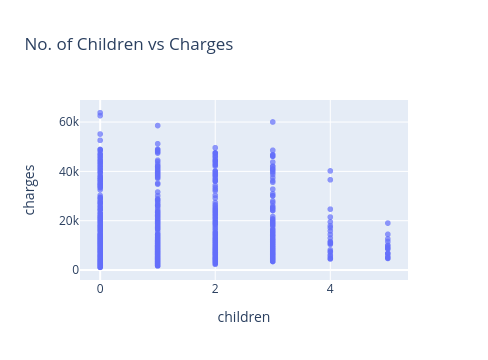

In [24]:
fig = px.scatter(medical_df,
           x='children',
           y='charges',
       #    color='sex',
           opacity=0.7,
           title='No. of Children vs Charges')
fig.show()

<p>This scatter plot doesn't much variation. So, instead use violin chart.</p>


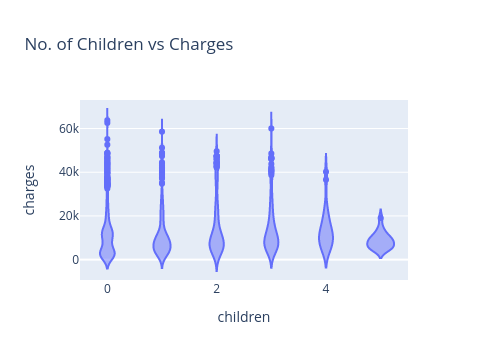

In [25]:
fig = px.violin(medical_df,
               x = 'children',
               y = 'charges',
           #    color = 'sex',
               title='No. of Children vs Charges')
fig.show()

<p> Regardless the No.of Children, majority of population have charges below 20k.</p>

### Sex vs Charges

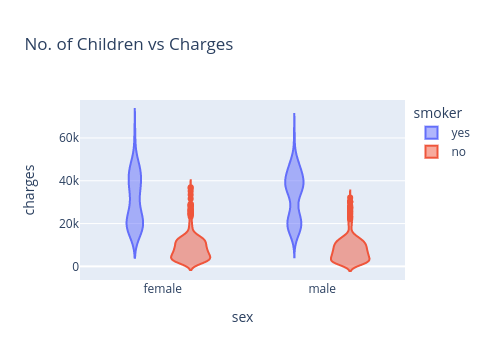

In [26]:
fig = px.violin(medical_df,
           x='sex',
           y='charges',
           color='smoker',
           title='No. of Children vs Charges')
fig.show()

<AxesSubplot:xlabel='sex', ylabel='charges'>

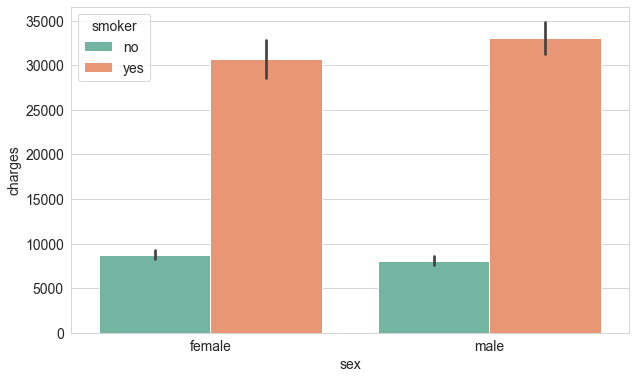

In [27]:
sns.barplot(data=medical_df,
           x='sex',
           y='charges',
           hue='smoker',
           palette='Set2',
           hue_order=['no','yes']
           )

### Region vs Charges

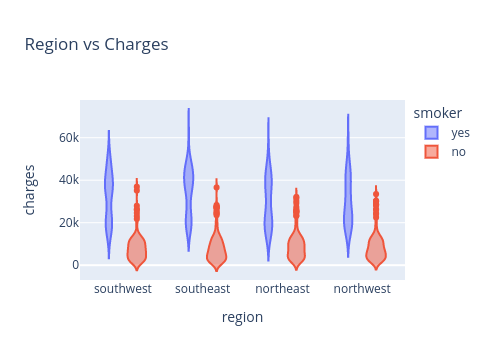

In [28]:
fig = px.violin(medical_df,
               x='region',
               y='charges',
               color='smoker',
               title='Region vs Charges')
fig.show()

<AxesSubplot:xlabel='region', ylabel='charges'>

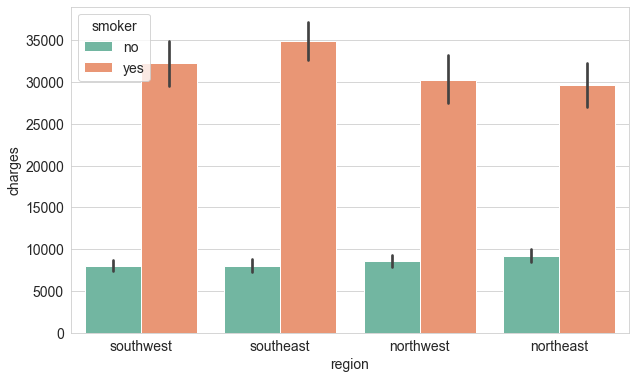

In [29]:
sns.barplot(data=medical_df,
           x='region',
           y='charges',
           hue='smoker',
           palette='Set2',
           hue_order=['no','yes']
           )

### Smoker vs Charges

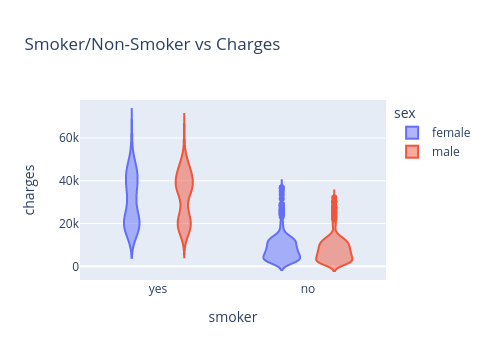

In [30]:
fig = px.violin(medical_df,
               x='smoker',
               y='charges',
               color='sex',
               title='Smoker/Non-Smoker vs Charges')
fig.show()

## Correlation Coefficient
<p>It is numerical representation of the relationship b/w 2 columns</p>

In [31]:
# Correlation coefficient of age, bmi with charges.
print('Age: ', medical_df.charges.corr(medical_df.age))
print('BMI: ', medical_df.charges.corr(medical_df.bmi))

Age:  0.29900812870116533
BMI:  0.19853818195267398


<p>This shows Age column is more closely related to Charges than BMI.</p>
<p>To compute correlation for categorical columns, we have to convert them into numeric values(dummy coding).</p>

In [32]:
smoker_numeric = medical_df.smoker.map({'no':0, 'yes':1})
medical_df.charges.corr(smoker_numeric)

0.7872514304705207

In [33]:
medical_df.corr()

age       bmi  children   charges
age       1.000000  0.109326  0.042469  0.299008
bmi       0.109326  1.000000  0.012724  0.198538
children  0.042469  0.012724  1.000000  0.067998
charges   0.299008  0.198538  0.067998  1.000000

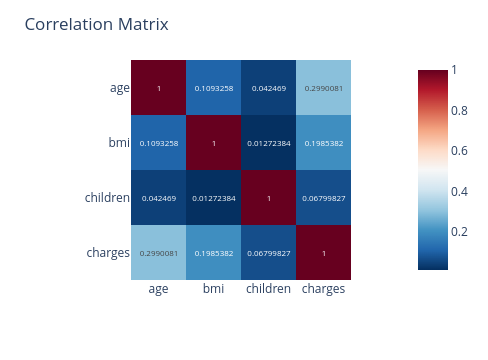

In [34]:
# Visualize Correlation Matrix
fig = px.imshow(medical_df.corr(),
               text_auto=True,
               color_continuous_scale='RdBu_r'
               )

fig.update_layout(title='Correlation Matrix')
fig.show()

---
### Linear Regression using a single feature
<p>Above analysis shows that the "smoker" and "age" columns have the strongest correlation with "charges". So, we use "age" column for non-smokers to predict 'charges'.</p>

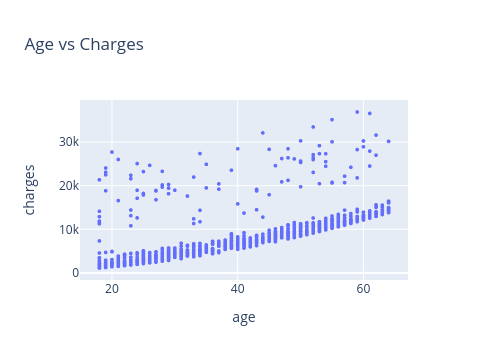

In [35]:
nonSmoker_df = medical_df[medical_df.smoker == 'no']
fig = px.scatter(nonSmoker_df,
          x='age',
          y='charges',
          title='Age vs Charges'
          )

fig.update_traces(marker_size=4)
fig.show()

<p>The points seem to form a line with few exceptions. We will try to fit using these points and predict the medical charges based on that line.</p>
<p>Formula for line on xy coordinates is:</p>

``` y = wx + b ```

> w : slope of line <br>
> b : intercept of line <br>
> x : input of model <br>
> y : target of model <br>
> w & b : parameters or weights of model

<p>Using above formula, we can estimate Charges with below equation.</p>

``` charges = w * age + b ```

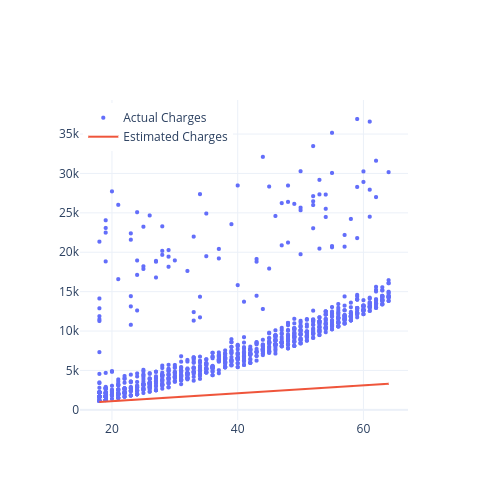

In [36]:
# Define helper function to estimate charges
def estimate_charges(age, w, b):
    return w * age + b

def try_parameters(w, b):
    age = nonSmoker_df.age
    target = nonSmoker_df.charges
    
    estimated_charges = estimate_charges(age, w, b)

    # check how the estimated_charges fits the actual data
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x = age,
        y = target,
        mode = 'markers',
        name = 'Actual Charges'
    ))

    fig.add_trace(go.Scatter(
        x = age,
        y = estimated_charges,
        mode = 'lines',
        name = 'Estimated Charges'
    ))

    fig.update_traces(
        marker_size = 4
    )

    fig.update_layout(
        legend = dict(
            yanchor='top', y = 0.99,
            xanchor='left', x = 0.01
        ),
        #width = 600,
        height = 500,
        template = 'plotly_white'
    )

    fig.show()
    
try_parameters(50, 100)

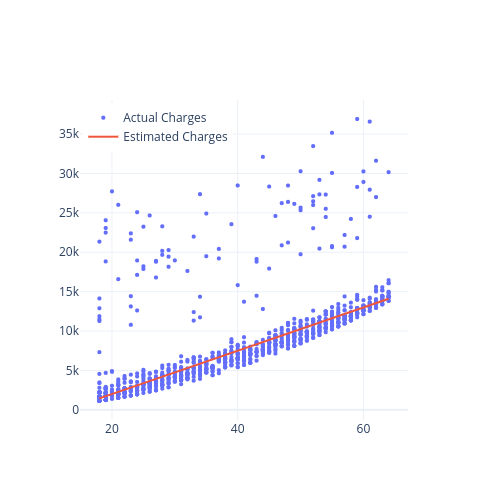

In [37]:
# try different values for w and b
try_parameters(275,-3500)

### Loss/Cost Function
This calculates the difference b/w targets and predictions. We are using **root mean squared error (RMSE)** as loss fuction.

In [38]:
def rmse(target, prediction):
    return np.sqrt(np.mean(np.square(target - prediction)))

RMSE loss:  4792.508873730318


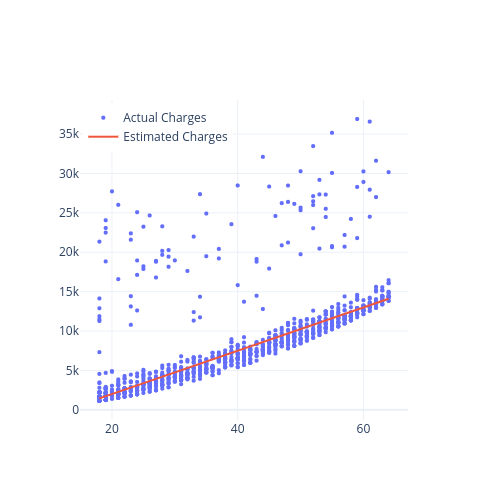

In [39]:
# Modifing try_parameters function, add rmse function in it

def try_parameters_m(w, b):
    age = nonSmoker_df.age
    target = nonSmoker_df.charges
    
    estimated_charges = estimate_charges(age, w, b)

    # check how the estimated_charges fits the actual data
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x = age,
        y = target,
        mode = 'markers',
        name = 'Actual Charges'
    ))

    fig.add_trace(go.Scatter(
        x = age,
        y = estimated_charges,
        mode = 'lines',
        name = 'Estimated Charges'
    ))

    fig.update_traces(
        marker_size = 4
    )

    fig.update_layout(
        legend = dict(
            yanchor='top', y = 0.99,
            xanchor='left', x = 0.01
        ),
        #width = 600,
        height = 500,
        template = 'plotly_white'
    )
    
    loss = rmse(target, estimated_charges)
    print('RMSE loss: ', loss)
    
    fig.show()
    
try_parameters_m(275,-3500)

### Optimizer
These functions can be used to reduce loss and improve the fit of line to actual data. Below techniques can be used for the same purpose.
- Ordinary Least Squares
- Stochastic Gradient Descent

### Linear Regression using Scikit-learn : Non-Smokers

In [40]:
# Create model
model = LinearRegression()

# Input and Target values
inputs = nonSmoker_df[['age']] # input(X) must be a 2d array
targets = nonSmoker_df['charges']

# Train the model
model.fit(inputs, targets)

# Generate predictions
LR_predictions = model.predict(inputs)

#Compute loss
loss = rmse(targets, LR_predictions)
print('Loss: ', loss)

Loss:  4662.506253819705


The parameters of the model are stored in the ```coef_``` and ```intercept_``` properties.

In [41]:
# value of w
model.coef_

array([267.24886724])

In [42]:
# value of b
model.intercept_

-2091.418731853986

RMSE loss:  4662.506253819705


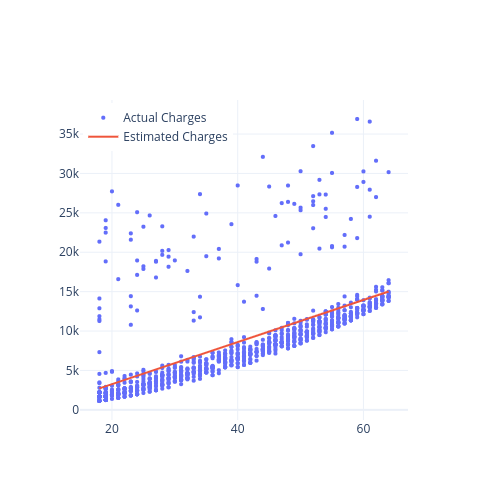

In [43]:
# Visualizing the line using these parameters

age = nonSmoker_df.age
target = nonSmoker_df.charges

# estimated_charges = estimate_charges(age, w, b)

# check how the estimated_charges fits the actual data
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = age,
    y = target,
    mode = 'markers',
    name = 'Actual Charges'
))

fig.add_trace(go.Scatter(
    x = age,
    y = LR_predictions,
    mode = 'lines',
    name = 'Estimated Charges'
))

fig.update_traces(
    marker_size = 4
)

fig.update_layout(
    legend = dict(
        yanchor='top', y = 0.99,
        xanchor='left', x = 0.01
    ),
    #width = 600,
    height = 500,
    template = 'plotly_white'
)

loss = rmse(target, LR_predictions)
print('RMSE loss: ', loss)

fig.show()

### Using SGDRegressor()

In [44]:
# Scaling input data
scaler = StandardScaler().fit(inputs)
x_scaled = scaler.transform(inputs)

# Create and train the model
SGD_model = SGDRegressor().fit(x_scaled, targets)

# Generate predictions
SGD_predictions = SGD_model.predict(x_scaled)

#Compute loss
loss = rmse(targets, SGD_predictions)
print('Loss: ', loss)

Loss:  4662.622762432666


In [45]:
print('Scaler mean: ', scaler.mean_)
print('Scaler scale: ', scaler.scale_)

Scaler mean:  [39.38533835]
Scaler scale:  [14.07679032]


In [46]:
# value of w
SGD_model.coef_

array([3774.66355249])

In [47]:
# value of b
SGD_model.intercept_

array([8464.7026985])

RMSE loss:  4662.622762432666


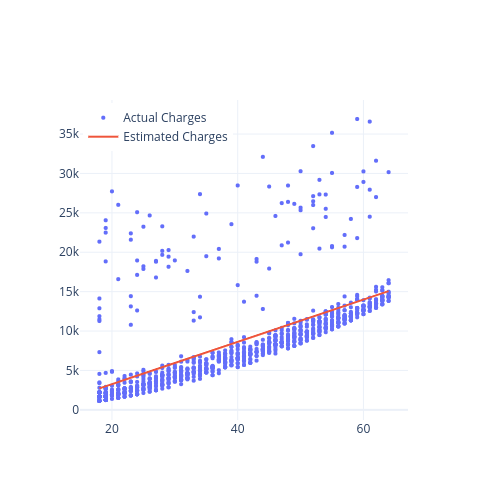

In [48]:
# Visualizing the line using these parameters

age = nonSmoker_df.age
target = nonSmoker_df.charges

# check how the estimated_charges fits the actual data
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = age,
    y = target,
    mode = 'markers',
    name = 'Actual Charges'
))

fig.add_trace(go.Scatter(
    x = age,
    y = SGD_predictions,
    mode = 'lines',
    name = 'Estimated Charges'
))

fig.update_traces(
    marker_size = 4
)

fig.update_layout(
    legend = dict(
        yanchor='top', y = 0.99,
        xanchor='left', x = 0.01
    ),
    #width = 600,
    height = 500,
    template = 'plotly_white'
)

loss = rmse(target, SGD_predictions)
print('RMSE loss: ', loss)

fig.show()


### Linear Regression using Scikit-learn : Smokers

In [49]:
smoker_df = medical_df[medical_df['smoker'] == 'yes']
s_input = smoker_df[['age']]
s_target = smoker_df['charges']
s_target.shape , s_input.shape

((274,), (274, 1))

In [50]:
smoker_df[['age', 'charges']].head()

age  charges
0    19  16884.9
11   62  27808.7
14   27  39611.8
19   30  36837.5
23   34  37701.9

In [51]:
# create and fit model
s_model = LinearRegression().fit(s_input, s_target)

# Generate predictions
s_predictions = s_model.predict(s_input)

# Calculate loss
s_loss = rmse(s_target, s_predictions)
print('Loss: ', s_loss)

Loss:  10711.004125072497


In [52]:
s_predictions[0:5]

array([26093.64443859, 39218.85783387, 28535.54460515, 29451.25716761,
       30672.20725089])

Create above model after scaling data.

In [53]:
# Scaling input data
s_scaler = StandardScaler().fit(s_input)
s_scaled = s_scaler.transform(s_input)

# Create and fit model
s_model1 = LinearRegression().fit(s_scaled, s_target)

# Generate predictions
s_predictions1 = s_model1.predict(s_scaled)

# Calculate loss
s_loss1 = rmse(s_target, s_predictions1)
print('Loss: ', s_loss1)

Loss:  10711.004125072497


RMSE loss:  10711.004125072497


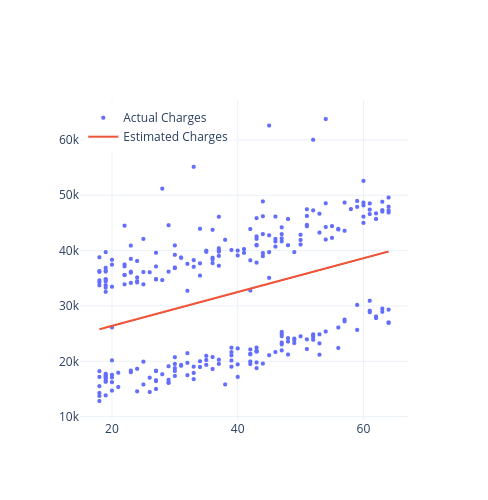

In [54]:
# Visualizing the line using these parameters

age = smoker_df.age
target = smoker_df.charges

# check how the estimated_charges fits the actual data
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = age,
    y = target,
    mode = 'markers',
    name = 'Actual Charges'
))

fig.add_trace(go.Scatter(
    x = age,
    y = s_predictions,
    mode = 'lines',
    name = 'Estimated Charges'
))

fig.update_traces(
    marker_size = 4
)

fig.update_layout(
    legend = dict(
        yanchor='top', y = 0.99,
        xanchor='left', x = 0.01
    ),
    #width = 600,
    height = 500,
    template = 'plotly_white'
)

loss = rmse(target, s_predictions)
print('RMSE loss: ', loss)

fig.show()

### Linear Regression using Multiple Features
Now, we will include other columns like 'bmi', 'children' in order to improve predictions of the linear model.
Assume the following relationship:
> charges = w1 * age + w2 * bmi + b

In [55]:
inputs, targets = nonSmoker_df[['age','bmi']], nonSmoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate Predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4662.31796606185


BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges

In [56]:
model.coef_, model.intercept_

(array([266.88105869,   6.99040261]), -2291.196848382737)

In [57]:
nonSmoker_df.charges.corr(nonSmoker_df.bmi)

0.08394769337301311

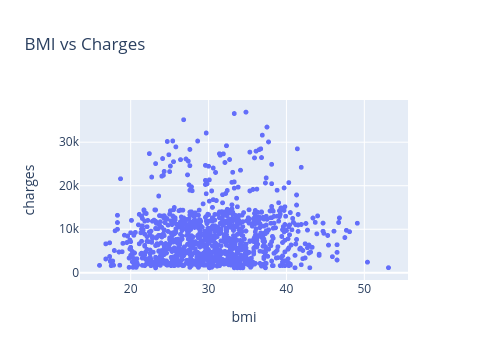

In [58]:
fig = px.scatter(nonSmoker_df,
                x = 'bmi',
                y = 'charges',
                title = 'BMI vs Charges'
                )
fig.update_traces(marker_size=5)
fig.show()

Visualize the relationship between "age", "bmi" and "charges" using a 3D scatter plot.

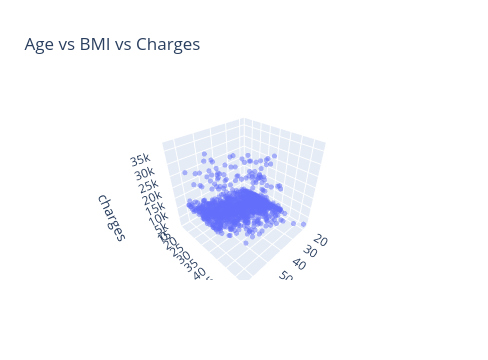

In [59]:
fig = px.scatter_3d(nonSmoker_df,
                   x = 'age',
                   y = 'bmi',
                   z = 'charges',
                   title = 'Age vs BMI vs Charges'
                   )
fig.update_traces(marker_size=3,
                 marker_opacity=0.5)
fig.show()

Now, use all 3 numerical columns to predict 'charges'.

In [60]:
nonSmoker_df.charges.corr(nonSmoker_df.children)

0.13892883435031675

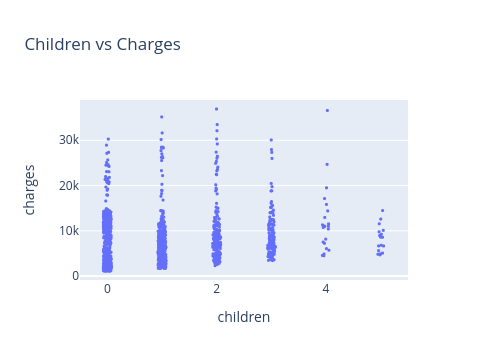

In [61]:
fig = px.strip(nonSmoker_df,
              x='children',
              y='charges',
              title='Children vs Charges'
              )
fig.update_traces(marker_size=3)
fig.show()

In [62]:
inputs, targets = nonSmoker_df[['age','children','bmi']], nonSmoker_df['charges']

# Create and train model
model = LinearRegression().fit(inputs, targets)

# Generate pridictions
predictions = model.predict(inputs)

# Compute loss
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4608.4742057318945


### Linear Regression using Multiple Features for Smokers

In [65]:
s_inputs = smoker_df[['age', 'children', 'bmi']]
s_targets = smoker_df['charges']

# create and fit model
s_model = LinearRegression().fit(s_inputs, s_targets)

# Generate predictions
s_predictions = s_model.predict(s_inputs)

# Compute loss
loss = rmse(s_targets, s_predictions)
print('Loss: ', loss)

Loss:  5714.8277565094695


### Using Categorical Features


In [67]:
medical_df['smoker_code'] = medical_df.smoker.map({'no':0, 'yes':1})

In [68]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304705207

In [70]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11354.92070254093


Now, create model with categorical column (smoker_code)

In [69]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.205779898655


In [71]:
sex_codes = {'female':0, 'male':1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [72]:
medical_df.charges.corr(medical_df.sex_code)

0.05729207993715011

Correlation b/w charges and sex_code is weak. So, sex_code can't improve the model by much.

Apart from **sex** column, we can use **region** column in the model. However, 1st we have to convert **region** to numerical column using **One-hot Encoding**.

In [74]:
enc = OneHotEncoder().fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [75]:
region_codes = enc.transform(medical_df[['region']]).toarray()
region_codes

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [76]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = region_codes
medical_df.head()

age     sex   bmi  children smoker     region  charges  smoker_code  \
0   19  female  27.9         0    yes  southwest  16884.9            1   
1   18    male  33.8         1     no  southeast   1725.6            0   
2   28    male  33.0         3     no  southeast   4449.5            0   
3   33    male  22.7         0     no  northwest  21984.5            0   
4   32    male  28.9         0     no  northwest   3866.9            0   

   sex_code  northeast  northwest  southeast  southwest  
0         0        0.0        0.0        0.0        1.0  
1         1        0.0        0.0        1.0        0.0  
2         1        0.0        0.0        1.0        0.0  
3         1        0.0        1.0        0.0        0.0  
4         1        0.0        1.0        0.0        0.0

In [84]:
# inputs and targets
inputs = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']]
targets = medical_df['charges']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6041.440409231758


This results in small reduction in the loss. It seems creating a separate models for smokers and non-smokers could provide better results. 

#### Linear model for Smokers using multiple features

In [78]:
# inputs and targets
inputs = medical_df[medical_df['smoker']=='yes'][['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']]
targets = medical_df[medical_df['smoker']=='yes']['charges']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  5665.128391284284


#### Linear model for Non-Smokers using multiple features

In [80]:
# inputs and targets
inputs = medical_df[medical_df['smoker']=='no'][['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']]
targets = medical_df[medical_df['smoker']=='no']['charges']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4573.087040222638


After reviewing losses from above models, It seems creating separate models for smokers and non-smokers provide better results. 

### Model Improvements
To compare the importance of each feature in the model, we can use their weights

In [87]:
model.coef_

array([  256.841489  ,   339.30910235,   475.5703509 , 23847.75705372,
        -131.86089081,   587.17259414,   233.87425403,  -447.95875657,
        -373.08809159])

In [88]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 'slope/intercept'),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

feature        weight
0              age    256.841489
1              bmi    339.309102
2         children    475.570351
3      smoker_code  23847.757054
4         sex_code   -131.860891
5        northeast    587.172594
6        northwest    233.874254
7        southeast   -447.958757
8        southwest   -373.088092
9  slope/intercept -12528.122002

It seems like BMI and the "northeast" have a higher weight than age, may be due to range of values for BMI (15-40) and northeast (0,1) is limited.

We can use **Feature Scaling**. 

In [89]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [90]:
scaler.mean_

array([39.20702541, 30.66330344,  1.09491779])

In [91]:
scaler.var_

array([197.25385199,  37.16094783,   1.45212664])

In [92]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45329944, -0.90861367],
       [-1.50996545,  0.51455182, -0.07876719],
       [-0.79795355,  0.38331775,  1.58092576],
       ...,
       [-1.50996545,  1.00667958, -0.90861367],
       [-1.29636188, -0.79778888, -0.90861367],
       [ 1.55168573, -0.25644834, -0.90861367]])

In [93]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [94]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.44040923176


We can now compare the weights

In [96]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 'Slope/intercepttt'),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

feature        weight
3        smoker_code  23847.757054
9  Slope/intercepttt   8466.917185
0                age   3607.263982
1                bmi   2068.420825
5          northeast    587.172594
2           children    573.082329
6          northwest    233.874254
4           sex_code   -131.860891
8          southwest   -373.088092
7          southeast   -447.958757

### Train/Test sets

In [103]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [104]:
# create and fit the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate Predictions
predictions_test = model.predict(inputs_test)

# Compute loss
loss = rmse(targets_test, predictions_test)
print('Loss: ', loss)

Loss:  6457.36395693852


In [105]:
# Generate Predictions for training data
predictions_train = model.predict(inputs_train)

# Compute loss
loss = rmse(targets_train, predictions_train)
print('Training loss: ', loss)

Training loss:  5993.820095055806
